# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style


C:\Users\Fakhruddin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r'C:\Users\Fakhruddin\Downloads\archive (8)\Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#delete a column

df = df.drop(columns = ['Unnamed: 0'])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
#details about data

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
#basic info about datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# Check for null values in the dataset

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# EDA

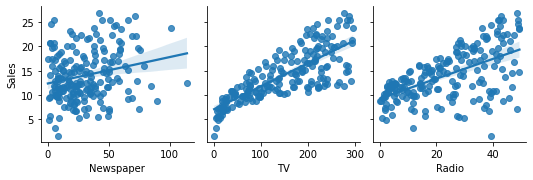

In [8]:
sns.pairplot(df, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales",kind='reg')

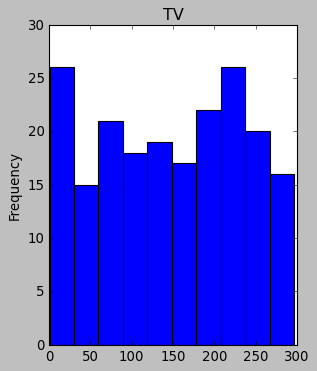

In [9]:
style.use('classic')
plt.figure(figsize=(4,5))


df['TV'].plot.hist(bins=10)
plt.title('TV')
plt.show()

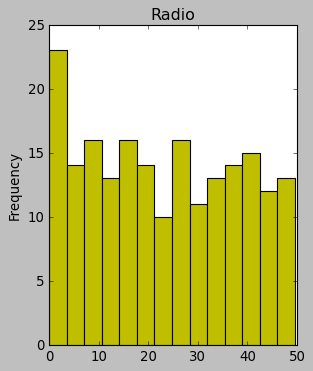

In [10]:
plt.figure(figsize=(4,5))


df['Radio'].plot.hist(bins=14, color ='y', xlabel='Radio' )
plt.title('Radio')
plt.show()


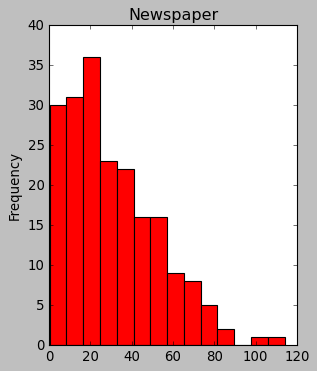

In [11]:
plt.figure(figsize=(4,5))


df['Newspaper'].plot.hist(bins=14, color ='r', xlabel='Radio' )
plt.title('Newspaper')
plt.show()

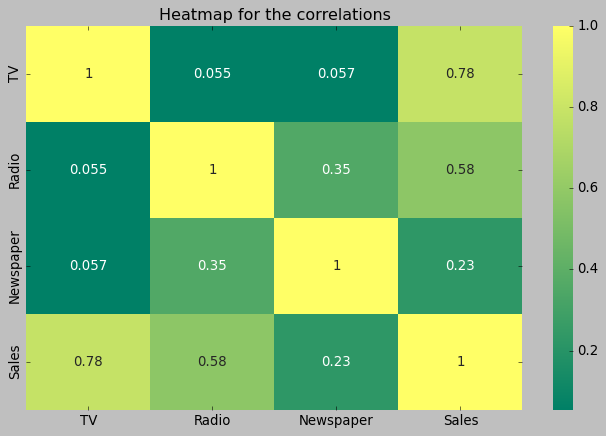

In [12]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(), annot = True, cmap='summer')
plt.title('Heatmap for the correlations')
plt.show()

In [13]:
#seprating the data and label
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [14]:
#splitting training and test dataset.


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [15]:
X


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
from sklearn import metrics

In [19]:
# prediction on training data
training_data_prediction= model.predict(X_train)

In [20]:
training_data_prediction

array([ 9.68827502, 12.67337707, 10.0553326 ,  8.20010235, 13.49562077,
        5.42585998,  9.2767456 , 14.14222434,  8.83116901, 11.63897134,
       15.42650259, 11.89014523, 12.82693587, 10.82735757,  6.58862301,
        9.93190159,  9.51414822, 24.0815284 ,  7.70552541, 12.49609325,
       17.71880786, 15.28339577, 11.42760282, 10.86633369, 16.78110726,
        6.93551369, 21.35732668,  6.16937955,  9.93897566, 11.52842846,
        9.29612342,  6.59177689, 14.90122344, 17.32216187, 15.80154544,
       16.28133624, 14.94912051, 19.55991189, 13.87795425, 21.04366162,
       12.62381325, 13.80024106,  8.96290787, 17.00702846,  8.41601918,
       15.28340432, 13.72169286, 23.2179245 , 12.53781447, 22.89655202,
        6.7146496 , 18.54942004, 23.38327322, 18.6439566 , 17.1342205 ,
       16.42698672, 12.44666834, 11.82149856, 16.94141141, 14.49733909,
       13.27071976,  7.69340245, 19.22784797,  9.63893927, 19.50751919,
       10.18954107,  7.09983872, 16.69074263, 13.75827407, 15.12

In [21]:
error_score=metrics.r2_score(y_train,training_data_prediction)
error_score

0.8957008271017818

In [22]:
# r2 score
error_score=metrics.r2_score(y_train,training_data_prediction)
print('r2 squre value is:',error_score*100,'%')

r2 squre value is: 89.57008271017818 %


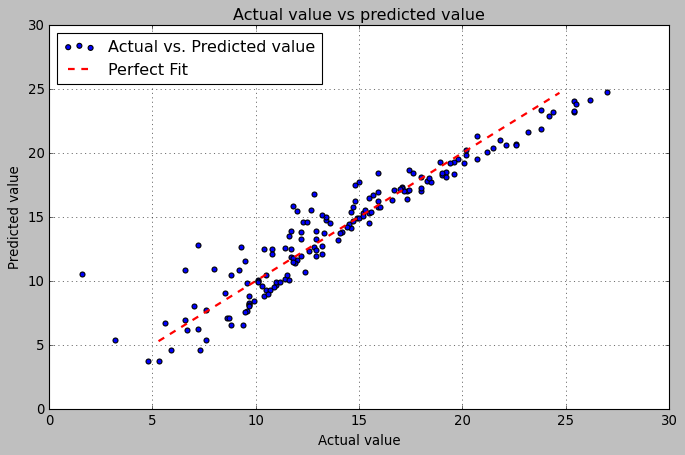

In [23]:
style.use('classic')
plt.figure(figsize=(10,6))


plt.scatter(y_train,training_data_prediction, label='Actual vs. Predicted value')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red',
        linewidth=2, label='Perfect Fit')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual value vs predicted value')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [24]:
### prediction on test data
test_data_prediction = model.predict(X_test)

In [25]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print('r2 squre value is:',error_score*100,'%')

r2 squre value is: 89.9438024100912 %


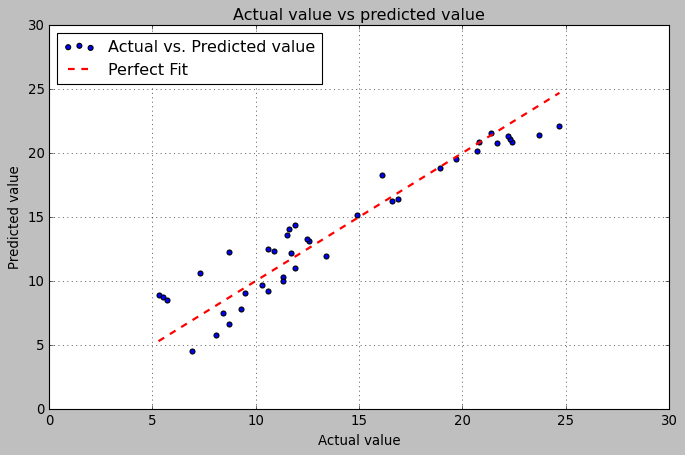

In [26]:
style.use('classic')
plt.figure(figsize=(10,6))


plt.scatter(y_test,test_data_prediction, label='Actual vs. Predicted value')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red',
        linewidth=2, label='Perfect Fit')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual value vs predicted value')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [28]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

mae = metrics.mean_absolute_error(y_test, test_data_prediction)
mape = mean_absolute_percentage_error(y_test, test_data_prediction)
mse = metrics.mean_squared_error(y_test, test_data_prediction)
r2 = metrics.r2_score(y_test, test_data_prediction)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1.4607567168117601
MAPE is 0.15198846602831229
MSE is 3.174097353976104
R2 score is 0.899438024100912
RMSE score is 1.7815996615334502


In [31]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error,r2_score
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 3.17
Root Mean Squared Error: 1.78
R-squared: 0.90
